# ***Classificação de Maças 2 - Machine Learning Direto ao Ponto***

### **Projeto Complementar e Não Extenso para Classificação da Qualidade das Maças entre Boa ou Ruim (Good, Bad), Modelo 2**
### **Direto ao Ponto porém Documentado**
### **Principais Etapas**
### **- Análise Exploratória de Dados**
### **- Tratamento de Dados**
### **- Análise Estatística**
### **- Machine Learning**

### **Importando Bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## ***Análise Exploratória de Dados - Tratamento de Dados***

### **Carregando o Arquivo e Visualizando Linhas**

In [2]:
df = pd.read_csv("apple_quality.csv")

df.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


### **Visualizando as Últimas 3 Linhas do Arquivo**

In [3]:
df.tail(3)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


### **Verificando Informações Gerais do Arquivo**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


### **Removendo Observações Desnecessárias e Reformulando o Recurso Acidity para Tipo Float**

In [5]:
df.dropna(inplace=True)

In [6]:
df["Acidity"] = df["Acidity"].astype(float)

### **Codificando Recurso Categórico de Quality como Binário**

In [7]:
df["Quality"] = (df["Quality"] == "good").astype(int)

In [8]:
df.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


### **Verificando a Quatidade de Cada Valor em "Quality"**

In [9]:
df.Quality.value_counts()

1    2004
0    1996
Name: Quality, dtype: int64

## ***Análise Estatística***
### **Análise Estatística dos Recursos**

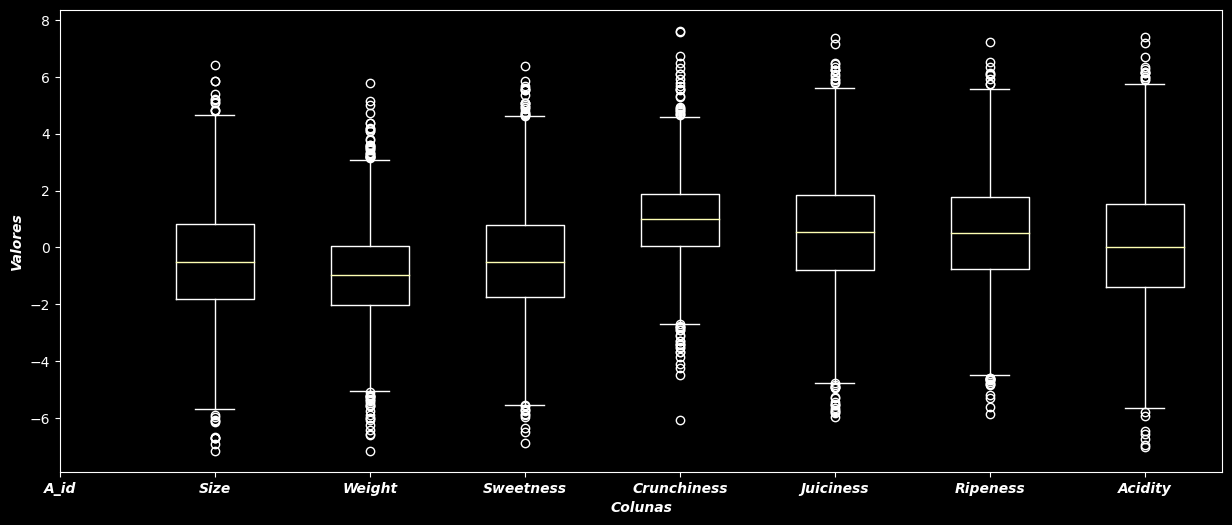

In [11]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(15, 6))

plt.boxplot([df["Size"], df["Weight"], df["Sweetness"],df["Crunchiness"], df["Juiciness"], df["Ripeness"], df["Acidity"]]);
plt.xlabel("Colunas", fontweight='bold', style='italic')
plt.ylabel("Valores", fontweight='bold', style='italic')

plt.xticks(range(len(df.columns)-1), labels=df.drop(columns="Quality").columns, fontweight='bold', style='italic');

<Axes: >

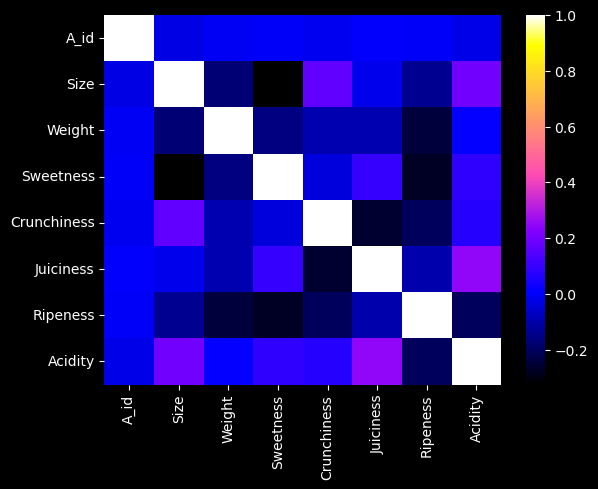

In [12]:
correlation = df.select_dtypes("number").drop(columns="Quality").corr()
sns.heatmap(correlation, cmap='gnuplot2')

## ***Machine Learning***

### **Apagando a Coluna "A_id" por ser Totalmente Desnecessária e Irrelevante, Fazendo Matriz de Recursos e Vetor Alvo, Definindo Dados para Treino e Teste**

In [16]:
df = df.drop("A_id", axis=1)

In [17]:
X = df.drop(columns="Quality")
y = df["Quality"]

print(X.shape)
print(y.shape)

(4000, 7)
(4000,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 7)
(800, 7)
(3200,)
(800,)


### **Definindo os Dados para Treino e Validação**

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(2880, 7)
(320, 7)
(2880,)
(320,)


### **Definindo a Base de Linha**

In [21]:
baseline_acc = df["Quality"].value_counts(normalize=True).max()

print(f"Acurácia da Base de Linha: {baseline_acc * 100}%")

Acurácia da Base de Linha: 50.1%


### **Criando o Modelo de Regressão Logística**

In [22]:
model_lr = LogisticRegression()

model_lr.fit(X_train,y_train)

LogisticRegression()

In [24]:
lr_train_acc = accuracy_score(y_train, model_lr.predict(X_train))
lr_val_acc = accuracy_score(y_val, model_lr.predict(X_val))

print(f"Acurácia de Treino da Regressão Logística: {round(lr_train_acc * 100)}%")
print(f"Acurácia de Validação da Regressão Logística: {round(lr_val_acc * 100)}%")

Acurácia de Treino da Regressão Logística: 75%
Acurácia de Validação da Regressão Logística: 74%


### **Criando Modelo de Árvore de Decisão**

In [25]:
model_dc = DecisionTreeClassifier(random_state=42)

model_dc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
dc_train_acc = accuracy_score(y_train, model_dc.predict(X_train))
dc_val_acc = accuracy_score(y_val, model_dc.predict(X_val))

print(f"Acurácia de Treino da Árvore de Decisão: {round(dc_train_acc * 100)}%")
print(f"Acurácia de Validação da Árvore de Decisão: {round(dc_val_acc * 100)}%")

Acurácia de Treino da Árvore de Decisão: 100%
Acurácia de Validação da Árvore de Decisão: 78%


In [27]:
tree_depth = model_dc.get_depth()
print(tree_depth)

18


### **Modelo SuperAjustado, Tentando Diferentes Hiperparâmetros para Encontrar a Precisão de Validação Ideal**

In [28]:
depth_hyperparams = range(1, 18, 1)
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Criando Modelo com o Hiperparâmetro de Profundidade
    model_dc = DecisionTreeClassifier(max_depth=d, random_state=42)
    model_dc.fit(X_train, y_train)
    # Calculando a Precisão para Treinamento e Validação e Anexando às Listas
    training_acc.append(accuracy_score(y_train, model_dc.predict(X_train)))
    validation_acc.append(accuracy_score(y_val, model_dc.predict(X_val)))

print(training_acc[:3])
print(validation_acc[:3])

[0.6114583333333333, 0.6864583333333333, 0.7027777777777777]
[0.625, 0.68125, 0.65625]


### **Visualizando Curva de Acurácia do Treino e da Validação pelo Modelo Árvore de Desisão**

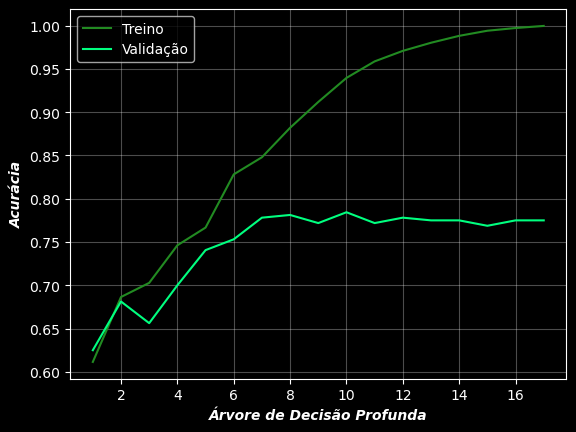

In [31]:
plt.plot(depth_hyperparams, training_acc, label="Treino", color='forestgreen')
plt.plot(depth_hyperparams, validation_acc, label="Validação", color='springgreen')
plt.xlabel("Árvore de Decisão Profunda", fontweight='bold', style='italic')
plt.ylabel("Acurácia", fontweight='bold', style='italic')
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [32]:
acc_df = pd.DataFrame({"depth":depth_hyperparams, "train_acc": training_acc, "val_acc": validation_acc}).set_index("depth")
acc_df['val_acc'].idxmax()

10

### **Modelo de Treinamento com Profundidade Ideal de 10**

In [33]:
model_dc = DecisionTreeClassifier(max_depth=10, random_state=42)
model_dc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [34]:
dc_train_acc = accuracy_score(y_train, model_dc.predict(X_train))
dc_val_acc = accuracy_score(y_val, model_dc.predict(X_val))

print(f"Acurácia de Treino da Árvore de Decisão: {round(dc_train_acc * 100)}%")
print(f"Acurácia de Validação da Árvore de Decisão: {round(dc_val_acc * 100)}%")

Acurácia de Treino da Árvore de Decisão: 94%
Acurácia de Validação da Árvore de Decisão: 78%


### **Avaliando os Modelos**

### **Testando o Modelo de Árvore de Decisão e o Modelo de Regressão Logística para ver qual tem melhor desempenho**

In [35]:
lr_test_acc = accuracy_score(y_test, model_lr.predict(X_test))
dc_test_acc = accuracy_score(y_test, model_dc.predict(X_test))


print(f"Teste de Acurácia Regressão Logística: {round(lr_test_acc * 100)}%") 
print(f"Teste de Acurácia Árvore de Decisão: {round(dc_test_acc * 100)}%")

Teste de Acurácia Regressão Logística: 76%
Teste de Acurácia Árvore de Decisão: 81%


### **Classificadores Importandes de Acordo com a Árvore de Decisão**

### **Como a Árvore de Decisão teve Melhor Desempenho, Vamos Verificar quais Funcionalidades (Features/Colunas) Tiveram maior Importância de Gini**

In [36]:
importances = model_dc.feature_importances_

feature_importances = pd.Series(index=X_train.columns, data=importances).sort_values(ascending=True)
feature_importances.sum()

1.0

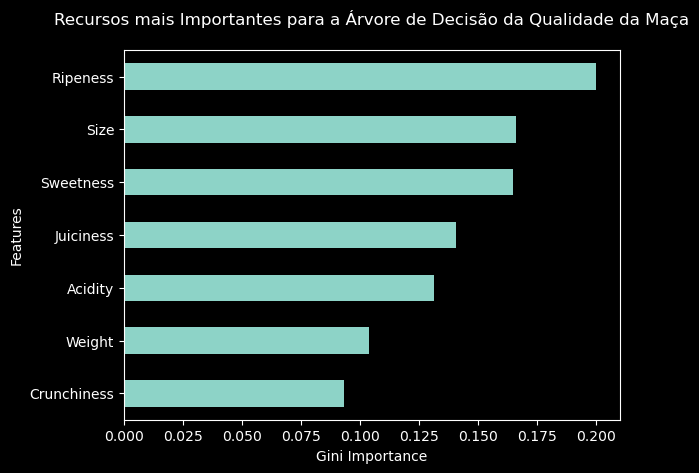

In [38]:
feature_importances.plot(kind="barh", ylabel="Features", xlabel="Gini Importance", 
                         title= "Recursos mais Importantes para a Árvore de Decisão da Qualidade da Maça\n");

# ***Conclusão:***

### **Entre um modelo de regressão logística e um classificador de árvore de decisão, este último teve uma pontuação de precisão superior em 5 pontos percentuais. O classificador de árvore de decisão teve 81% de precisão, mas a amostra de dados usada para treinar e testar o modelo foi bastante pequena (4.000 observações). As características utilizadas pelo modelo para dividir as decisões foram de importância semelhante, variando de 10% a 20%.**